#LAB 1 Artificial Inteligence Javier Huerta Yumha.

In [55]:
!pip -q install numpy gensim scikit-learn

In [56]:
import pandas as pd
import numpy as np
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sn

from pandas.api.types import is_numeric_dtype
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest, chi2


#Upload a google drive file

**When running the next line, it will ask you for a code, please follow the instructions then insert the delivered code and press enter**

In [57]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Once our drive is loaded we load the file(s) to be used

In [58]:
ruta_data_set = 'gdrive/My Drive/BASEFUGA2020.xls'
data_set = pd.read_excel(ruta_data_set, encoding='latin1')

Database variable description:


1. ID: Customer ID.
2. Genre: Customer genre.
3. Age: Age in years.
4. NIV_Educ: Educational level.
5. E_Civil: Marital status.
6. City: Office City.
7. D_Marzo: March Debt.
8. D_Abril: April Debt.
9. D_Mayo: May Debt.
10. D_Junio: Debt of June.
11. D_Julio: Debt of July.
12. D_Agosto: Debt of August.
13. D_Septiembre: September Debt.
14. M_Moroso: Months in Mora.
15. Amount: Preapproved Amount.
16. Insurance: Lien insurance.
17. Leak: target variable. #Past






# Exploratory Data Analysis


Exploratory data analysis (EDA) involves examining the data to understand it in a basic way, seeing the relationships between the variables analyzed, and finding possible inconsistencies in them, such as atypical data and missing data.

All this prior to the application of any statistical technique.

This analyzes the descriptive statistics of the database and the graphs of the variables to see their behavior.

## Descriptive statistics

To analyze the behavior of the data of the numeric variables, we obtain the mean, standard deviation, minimum, maximum and quartiles.

While for categorical variables we get the number of categories of the variable (unique), the mode (top) and the frequency of mode (freq).

In [59]:
data_set.describe(include='all') 

,ID,GENERO,EDAD,NIV_EDUC,E_CIVIL,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
count,2294.000000,2283,2292.000000,2281,2282,2290,2.293000e+03,2.293000e+03,2.294000e+03,2.294000e+03,2293.000000,2293.000000,2294.000000,2292.000000,2.293000e+03,2294,2294
unique,NaN,2,NaN,5,4,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,M,NaN,UNV,CAS,SANTIAGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NOFUGA
freq,NaN,1385,NaN,946,1429,1389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1816,1157
mean,1147.500000,NaN,43.551920,NaN,NaN,NaN,1.530874e+05,2.726998e+05,1.032315e+05,1.899761e+05,567.093328,3580.321413,1940.639494,1.250436,3.477824e+06,NaN,NaN
std,662.365081,NaN,8.875511,NaN,NaN,NaN,4.982859e+05,4.024124e+05,8.706984e+05,6.705042e+05,1075.500117,8944.021261,9868.816840,0.752197,2.293166e+06,NaN,NaN
min,1.000000,NaN,-50.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.000000e+05,NaN,NaN
25%,574.250000,NaN,39.000000,NaN,NaN,NaN,0.000000e+00,1.759600e+04,0.000000e+00,0.000000e+00,7.000000,0.000000,0.000000,1.000000,1.700000e+06,NaN,NaN
50%,1147.500000,NaN,44.000000,NaN,NaN,NaN,0.000000e+00,1.341700e+05,0.000000e+00,5.502000e+03,146.000000,0.000000,56.000000,1.000000,2.600000e+06,NaN,NaN
75%,1720.750000,NaN,50.000000,NaN,NaN,NaN,0.000000e+00,3.745150e+05,0.000000e+00,1.749060e+05,630.000000,1493.000000,497.250000,2.000000,4.800000e+06,NaN,NaN


With dtypes we can also know, the type of data.

In [60]:
data_set.dtypes

ID                int64
GENERO           object
EDAD            float64
NIV_EDUC         object
E_CIVIL          object
CIUDAD           object
D_Marzo         float64
D_Abril         float64
D_Mayo            int64
D_Junio           int64
D_Julio         float64
D_Agosto        float64
D_Septiembre      int64
M_MOROSO        float64
MONTO           float64
SEGURO           object
FUGA             object
dtype: object

We can also see the data in each variable, as shown below:

In [61]:
data_set.tail()

,ID,GENERO,EDAD,NIV_EDUC,E_CIVIL,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
2289,2290,F,43.0,TEC,SOL,SANTIAGO,0.0,1107.0,0,643303,4014.0,2431.0,138,3.0,1100000.0,SI,NOFUGA
2290,2291,M,54.0,TEC,SOL,CONCEPCION,0.0,261891.0,0,1008519,2.0,0.0,170,1.0,1800000.0,NO,FUGA
2291,2292,M,51.0,UNV,SOL,ARICA,729256.0,0.0,0,0,1645.0,0.0,0,1.0,4200000.0,NO,FUGA
2292,2293,M,42.0,UNV,CAS,SANTIAGO,0.0,406679.0,0,257251,37.0,1606.0,173,2.0,4600000.0,NO,FUGA
2293,2294,M,49.0,UNV,CAS,SANTIAGO,26777.0,387176.0,0,255822,263.0,11240.0,265,1.0,2100000.0,NO,FUGA


We count the lost values of each variable to see if there is any null value.

In [62]:
data_set.isnull().sum()

ID               0
GENERO          11
EDAD             2
NIV_EDUC        13
E_CIVIL         12
CIUDAD           4
D_Marzo          1
D_Abril          1
D_Mayo           0
D_Junio          0
D_Julio          1
D_Agosto         1
D_Septiembre     0
M_MOROSO         2
MONTO            1
SEGURO           0
FUGA             0
dtype: int64

## Charts

Charts allow us to identify bivariate patterns, visualize data and outliers. Some examples of them are shown below

Standard Histogram

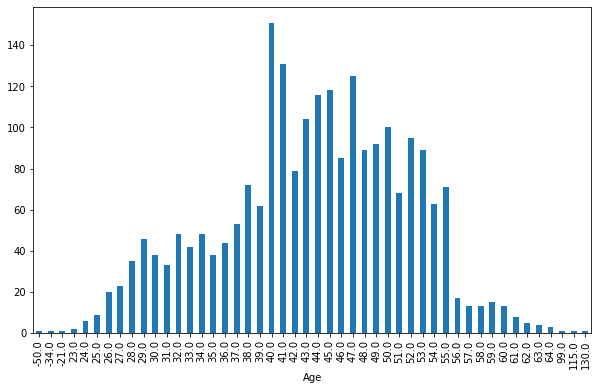

In [63]:
data_set['EDAD'].value_counts().sort_index().plot.bar(figsize=(10,6))
plt.xlabel('Age')
plt.show()

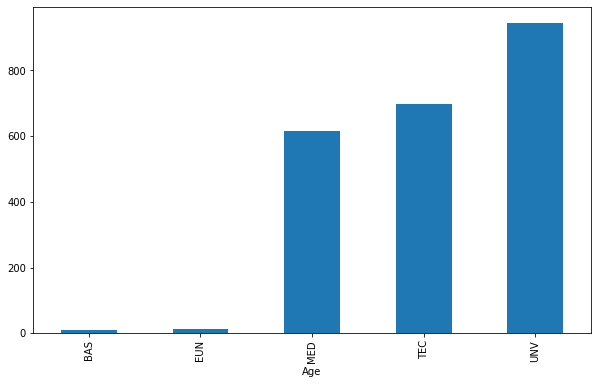

In [64]:
data_set['NIV_EDUC'].value_counts().sort_index().plot.bar(figsize=(10,6))
plt.xlabel('Age')
plt.show()

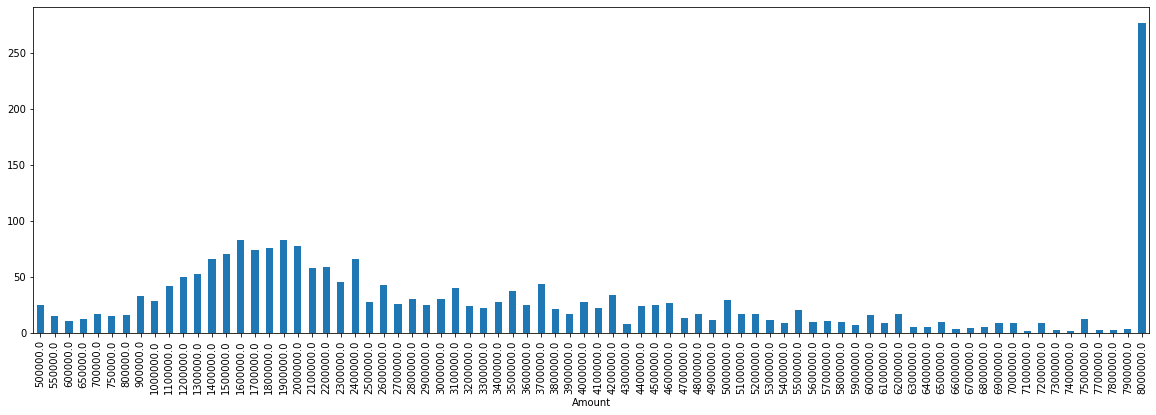

In [65]:
data_set['MONTO'].value_counts().sort_index().plot.bar(figsize=(20,6))
plt.xlabel('Amount')
plt.show()

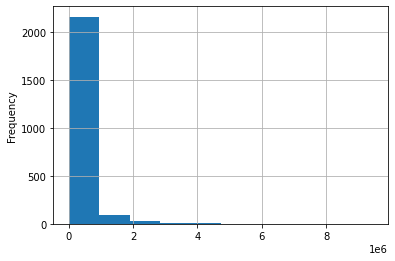

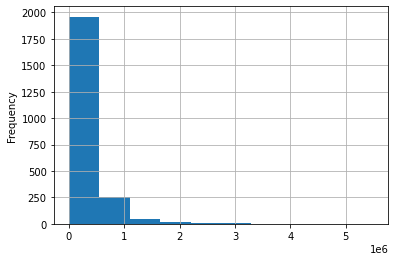

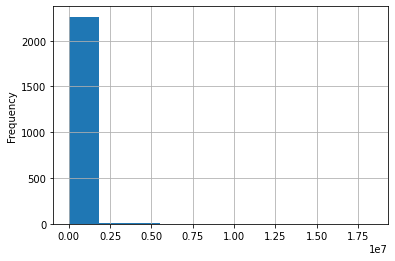

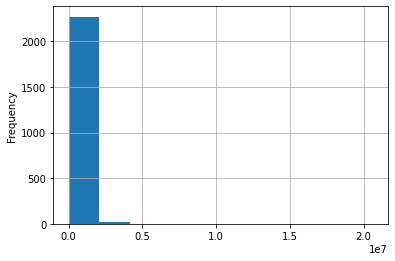

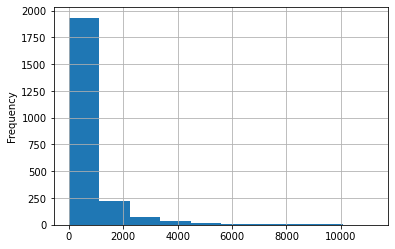

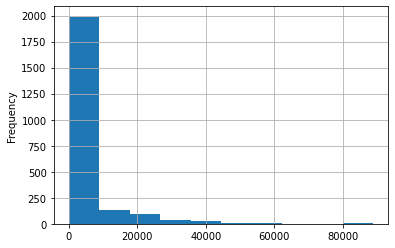

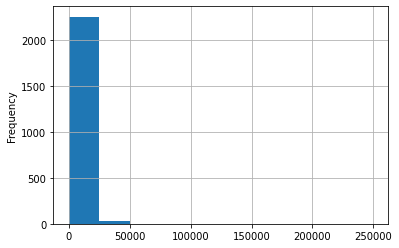

In [66]:
data_set['D_Marzo'].plot(kind='hist', grid=True )
plt.show()
data_set['D_Abril'].plot(kind='hist', grid=True)
plt.show()
data_set['D_Mayo'].plot(kind='hist', grid=True )
plt.show()
data_set['D_Junio'].plot(kind='hist', grid=True )
plt.show()
data_set['D_Julio'].plot(kind='hist', grid=True)
plt.show()
data_set['D_Agosto'].plot(kind='hist', grid=True )
plt.show()
data_set['D_Septiembre'].plot(kind='hist', grid=True )
plt.show()

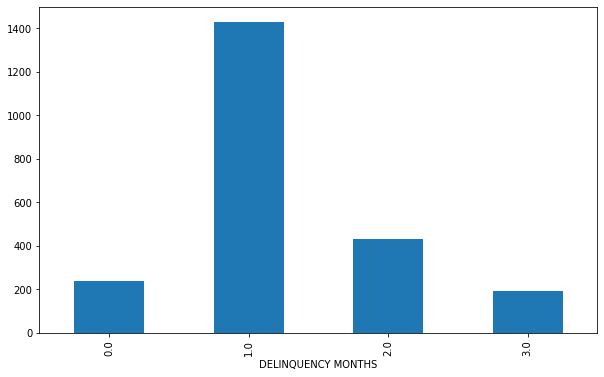

In [67]:
data_set['M_MOROSO'].value_counts().sort_index().plot.bar(figsize=(10,6))
plt.xlabel('DELINQUENCY MONTHS')
plt.show()

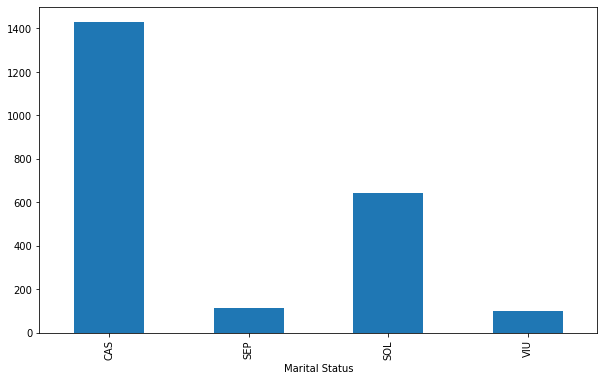

In [68]:
data_set['E_CIVIL'].value_counts().sort_index().plot.bar(figsize=(10,6))
plt.xlabel('Marital Status')
plt.show()

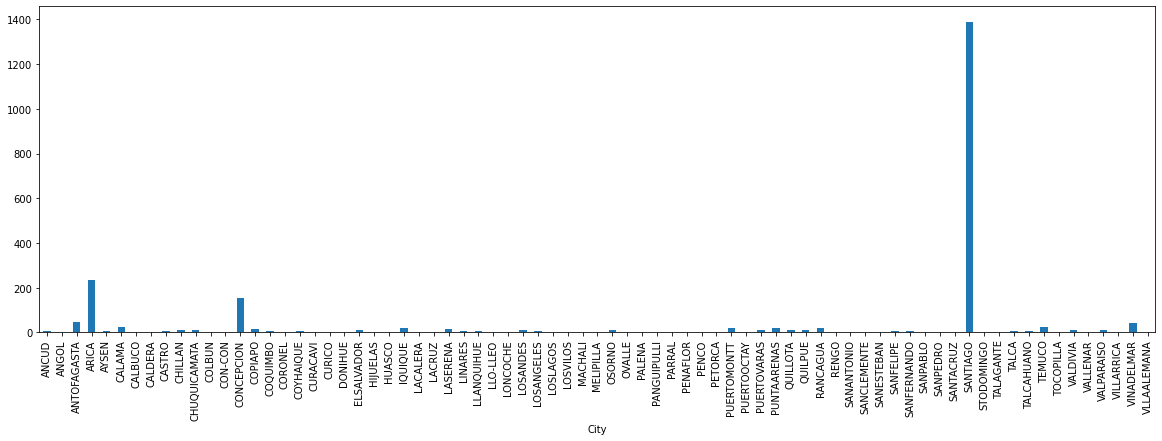

In [69]:
data_set['CIUDAD'].value_counts().sort_index().plot.bar(figsize=(20,6))
plt.xlabel('City')
plt.show()

Histogram of points to display outliers

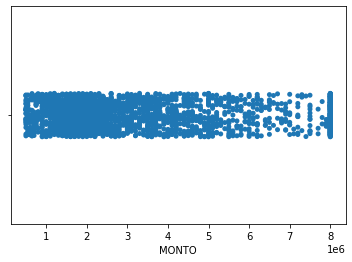

In [70]:
sn.stripplot(x='MONTO', data=data_set)
plt.show()

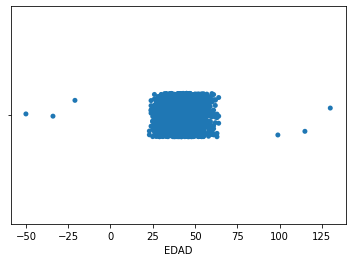

In [71]:
sn.stripplot(x='EDAD', data=data_set) 
plt.show()

Color Histogram, to see relevance of the target variable in the values of a variable.

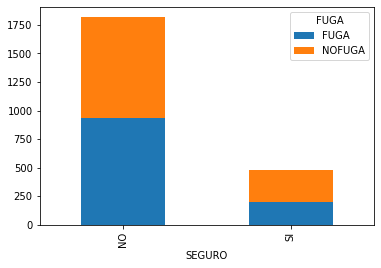

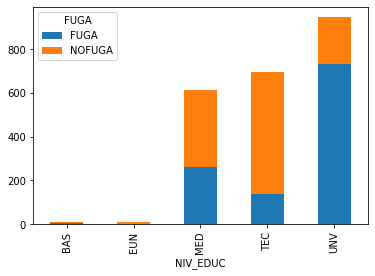

In [72]:
data_set.groupby(['SEGURO', 'FUGA']).size().unstack().plot.bar(stacked=True) 
plt.show()
data_set.groupby(['NIV_EDUC', 'FUGA']).size().unstack().plot.bar(stacked=True)
plt.show()


We can also make the histogram color with proportions.

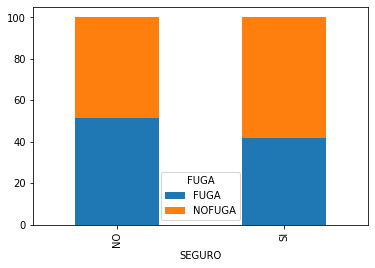

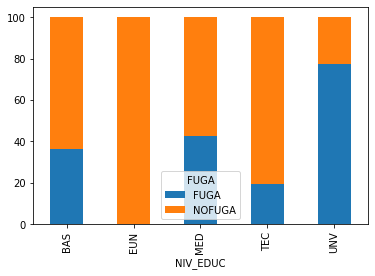

In [73]:
data_set.groupby(['SEGURO', 'FUGA']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True) 
#plt.xscale('linear')
plt.show()
data_set.groupby(['NIV_EDUC', 'FUGA']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True) 
plt.show()

Box plot

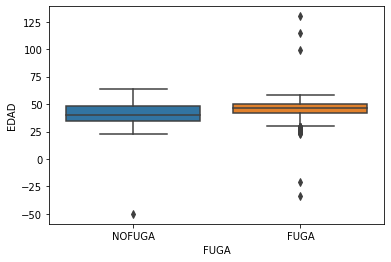

In [74]:
sn.boxplot(x="FUGA", y="EDAD", data=data_set) 
plt.show()

Point chart to see redundancy between two variables

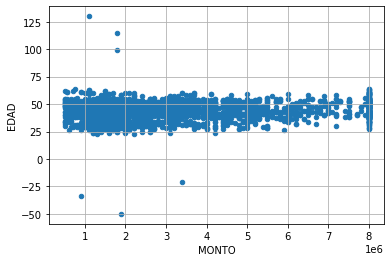

In [75]:
data_set.plot(kind='scatter', x='MONTO', y='EDAD', grid=True)
plt.show()



# Data cleansing

Data cleansing is to eliminate the inconsistencies found in exploratory analysis of data, such as lost values and atypical values, so that the database can work without altering the results.

First we declare outliers as lost values (inconsistencies) and then work them (imputating lost values).

## Inconsistencies

We declare values that are out of range as lost values, so that we can identify them.

In [76]:
data_set.loc[data_set['EDAD'] > 95, ['EDAD']] = np.nan
data_set.loc[data_set['EDAD'] < 18, ['EDAD']] = np.nan


## Imputing lost values

**Elimination of cases**

We also use this alternative when the lost values are less than 5% of the total data and consists of deleting all rows where there is any null value. It does not alter the results but loses the information of the other variables in that row.

In [77]:
data_set = data_set.dropna(axis=0, how='any')

We confirm that there are no missing values in the database

In [78]:
data_set.isnull().sum()

ID              0
GENERO          0
EDAD            0
NIV_EDUC        0
E_CIVIL         0
CIUDAD          0
D_Marzo         0
D_Abril         0
D_Mayo          0
D_Junio         0
D_Julio         0
D_Agosto        0
D_Septiembre    0
M_MOROSO        0
MONTO           0
SEGURO          0
FUGA            0
dtype: int64

We delete the 'ID' variable because it is not necessary for the model and 'GENERO' because it's not etical to give or not credit to a person because of his/her sex.

In [79]:
del data_set['ID']
del data_set['GENERO']

## We transform data to a new scale

First we saw the distribution of asymmetric variables, here 

---


https://colab.research.google.com/drive/1Dgp0uAt8ZsxRYZeKoX-FgoMhIIaWvIuTscrollTo=Vzr1y4fhV7xZ&line=6&uniqifier=1



As we saw the variable are concentrated in an interval, so we apply its logarithm:

In [ ]:
data_set['LD_Marzo'] = np.log(data_set['D_Marzo']+1)
data_set['LD_Abril'] = np.log(data_set['D_Abril']+1)
data_set['LD_Mayo'] = np.log(data_set['D_Mayo']+1)
data_set['LD_Junio'] = np.log(data_set['D_Junio']+1)
data_set['LD_Julio'] = np.log(data_set['D_Julio']+1)
data_set['LD_Agosto'] = np.log(data_set['D_Agosto']+1)
data_set['LD_Septiembre'] = np.log(data_set['D_Septiembre']+1)

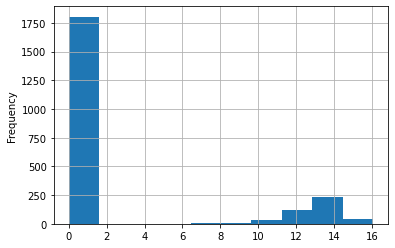

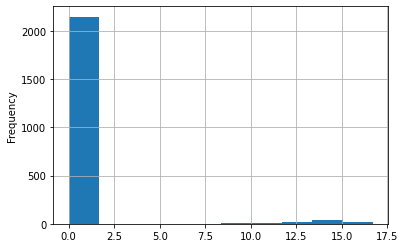

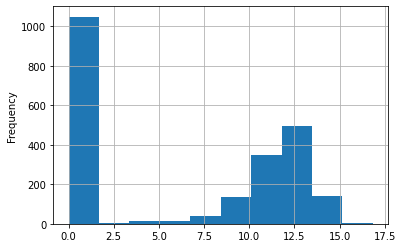

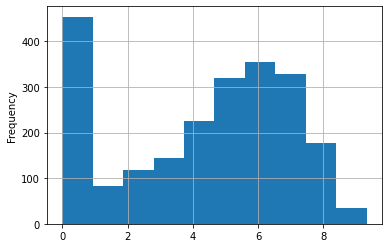

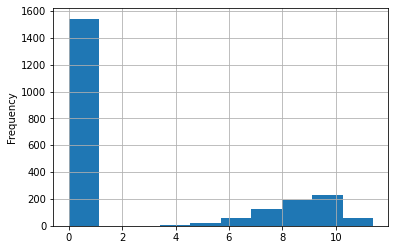

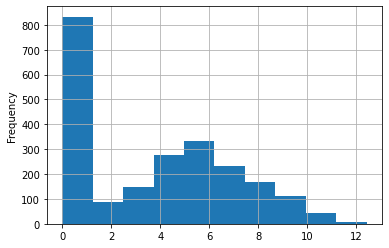

In [81]:
data_set['LD_Marzo'].plot(kind='hist', grid=True )
plt.show()
data_set['LD_Mayo'].plot(kind='hist', grid=True )
plt.show()
data_set['LD_Junio'].plot(kind='hist', grid=True )
plt.show()
data_set['LD_Julio'].plot(kind='hist', grid=True )
plt.show()
data_set['LD_Agosto'].plot(kind='hist', grid=True )
plt.show()
data_set['LD_Septiembre'].plot(kind='hist', grid=True )
plt.show()


Now, if we graph their logarithms we can see that they don't have a normal distribution. But they have something like a 'bimodal' distribution, and also the data has experimented an exponential smoothing

We remove the old variables to stay with only their logarithms.

In [82]:
del data_set['D_Marzo']
del data_set['D_Abril']
del data_set['D_Mayo']
del data_set['D_Junio']
del data_set['D_Julio']
del data_set['D_Agosto']
del data_set['D_Septiembre']

## Aggregation

For the 'E_CIVIL' variable we will group your data to reduce its classes. 
Therefore, we will join two classes into one, when the variable takes the value widow, 'separated' as shown in the example below:

SEP + VIU = SOL

In [83]:
data_set['E_CIVIL'] = data_set['E_CIVIL'].replace('SEP', 'SOL')
data_set['E_CIVIL'] = data_set['E_CIVIL'].replace('VIU', 'SOL')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


For the 'CIUDAD' variable we will group your data to reduce its classes. Therefore, we will join all cities that are not Santiago:


In [84]:
data_set['CIUDAD'] = np.where(data_set['CIUDAD'] == 'SANTIAGO', 1, data_set['CIUDAD'])
data_set['CIUDAD'] = np.where((data_set['CIUDAD'] != 'SANTIAGO') & (data_set['CIUDAD'] != 1), 0, data_set['CIUDAD'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [85]:
data_set.head()

,EDAD,NIV_EDUC,E_CIVIL,CIUDAD,M_MOROSO,MONTO,SEGURO,FUGA,LD_Marzo,LD_Abril,LD_Mayo,LD_Junio,LD_Julio,LD_Agosto,LD_Septiembre
0,39.0,MED,CAS,0,2.0,2000000.0,NO,NOFUGA,0.0,10.553022,0.0,12.981624,7.477038,9.117238,5.831882
1,49.0,MED,SOL,1,1.0,7500000.0,SI,NOFUGA,0.0,0.000000,0.0,0.000000,3.891820,0.000000,0.000000
2,39.0,TEC,CAS,0,1.0,8000000.0,NO,NOFUGA,0.0,13.311611,0.0,0.000000,5.780744,10.184523,7.981392
3,36.0,UNV,CAS,1,1.0,2600000.0,NO,NOFUGA,0.0,8.542081,0.0,12.201055,4.553877,0.000000,4.663439
4,44.0,TEC,CAS,1,1.0,6400000.0,NO,NOFUGA,0.0,9.388235,0.0,11.211280,5.010635,0.000000,5.609472


## We transform data into binary variables

We transform the categorical variables of the database to binary variables

To transform all categorical variables in the database to binary variables:

In [86]:
data_set_T = data_set 
data_set_T = pd.get_dummies(data_set_T, drop_first= True)
data_set_T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2293
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EDAD           2239 non-null   float64
 1   M_MOROSO       2239 non-null   float64
 2   MONTO          2239 non-null   float64
 3   LD_Marzo       2239 non-null   float64
 4   LD_Abril       2239 non-null   float64
 5   LD_Mayo        2239 non-null   float64
 6   LD_Junio       2239 non-null   float64
 7   LD_Julio       2239 non-null   float64
 8   LD_Agosto      2239 non-null   float64
 9   LD_Septiembre  2239 non-null   float64
 10  NIV_EDUC_EUN   2239 non-null   uint8  
 11  NIV_EDUC_MED   2239 non-null   uint8  
 12  NIV_EDUC_TEC   2239 non-null   uint8  
 13  NIV_EDUC_UNV   2239 non-null   uint8  
 14  E_CIVIL_SOL    2239 non-null   uint8  
 15  CIUDAD_1       2239 non-null   uint8  
 16  SEGURO_SI      2239 non-null   uint8  
 17  FUGA_NOFUGA    2239 non-null   uint8  
dtypes: float

In [87]:
data_set_T.head()

,EDAD,M_MOROSO,MONTO,LD_Marzo,LD_Abril,LD_Mayo,LD_Junio,LD_Julio,LD_Agosto,LD_Septiembre,NIV_EDUC_EUN,NIV_EDUC_MED,NIV_EDUC_TEC,NIV_EDUC_UNV,E_CIVIL_SOL,CIUDAD_1,SEGURO_SI,FUGA_NOFUGA
0,39.0,2.0,2000000.0,0.0,10.553022,0.0,12.981624,7.477038,9.117238,5.831882,0,1,0,0,0,0,0,1
1,49.0,1.0,7500000.0,0.0,0.000000,0.0,0.000000,3.891820,0.000000,0.000000,0,1,0,0,1,1,1,1
2,39.0,1.0,8000000.0,0.0,13.311611,0.0,0.000000,5.780744,10.184523,7.981392,0,0,1,0,0,0,0,1
3,36.0,1.0,2600000.0,0.0,8.542081,0.0,12.201055,4.553877,0.000000,4.663439,0,0,0,1,0,1,0,1
4,44.0,1.0,6400000.0,0.0,9.388235,0.0,11.211280,5.010635,0.000000,5.609472,0,0,1,0,0,1,0,1


In [88]:
data_set = data_set_T

## Discretization

Discretization is about transforming continuous variables into categorical variables. With this we increase the variables to create better discrimination of them.

**We discretize the Age variable**

We have to establish a criterion to divide the variables, in this case we will do it by quantity.

We define the split points to use:



In [90]:
cut_points = data_set['EDAD'].quantile([0, .2, .4, .6, .8, 1]) #the array is how I want to divide the data

Now we discretize the Age variable with the defined points:

In [91]:
Age_binned = pd.cut(data_set['EDAD'], bins =cut_points, include_lowest= True) # bins can be an int also with the number of dividations in the interval and based on that divides it
print(Age_binned)

0         (37.0, 42.0]
1         (46.0, 51.0]
2         (37.0, 42.0]
3       (22.999, 37.0]
4         (42.0, 46.0]
             ...      
2289      (42.0, 46.0]
2290      (51.0, 64.0]
2291      (46.0, 51.0]
2292      (37.0, 42.0]
2293      (46.0, 51.0]
Name: EDAD, Length: 2239, dtype: category
Categories (5, interval[float64]): [(22.999, 37.0] < (37.0, 42.0] < (42.0, 46.0] < (46.0, 51.0] <
                                    (51.0, 64.0]]


Then Age_binned will be the discretized Age variable.

**We discretize the 'MONTO' variable**

We do the same analysis as for the 'MONTO' variable.

In [92]:
cut_points = data_set['MONTO'].quantile([0, .2, .4, .6, .8, 1]) 
Amount_binned = pd.cut(data_set['MONTO'], bins =cut_points, include_lowest= True)
print(Amount_binned)


0        (1600000.0, 2200000.0]
1        (5500000.0, 8000000.0]
2        (5500000.0, 8000000.0]
3        (2200000.0, 3400000.0]
4        (5500000.0, 8000000.0]
                 ...           
2289    (499999.999, 1600000.0]
2290     (1600000.0, 2200000.0]
2291     (3400000.0, 5500000.0]
2292     (3400000.0, 5500000.0]
2293     (1600000.0, 2200000.0]
Name: MONTO, Length: 2239, dtype: category
Categories (5, interval[float64]): [(499999.999, 1600000.0] < (1600000.0, 2200000.0] <
                                    (2200000.0, 3400000.0] < (3400000.0, 5500000.0] <
                                    (5500000.0, 8000000.0]]


In [93]:
data_set.head()

,EDAD,M_MOROSO,MONTO,LD_Marzo,LD_Abril,LD_Mayo,LD_Junio,LD_Julio,LD_Agosto,LD_Septiembre,NIV_EDUC_EUN,NIV_EDUC_MED,NIV_EDUC_TEC,NIV_EDUC_UNV,E_CIVIL_SOL,CIUDAD_1,SEGURO_SI,FUGA_NOFUGA
0,39.0,2.0,2000000.0,0.0,10.553022,0.0,12.981624,7.477038,9.117238,5.831882,0,1,0,0,0,0,0,1
1,49.0,1.0,7500000.0,0.0,0.000000,0.0,0.000000,3.891820,0.000000,0.000000,0,1,0,0,1,1,1,1
2,39.0,1.0,8000000.0,0.0,13.311611,0.0,0.000000,5.780744,10.184523,7.981392,0,0,1,0,0,0,0,1
3,36.0,1.0,2600000.0,0.0,8.542081,0.0,12.201055,4.553877,0.000000,4.663439,0,0,0,1,0,1,0,1
4,44.0,1.0,6400000.0,0.0,9.388235,0.0,11.211280,5.010635,0.000000,5.609472,0,0,1,0,0,1,0,1


# Filters (Attribute selection)

Filters are used to choose a subset of relevant variables, eliminating noise-generating variables and confusing the model.

There are 3 criteria:

## Inutility

This criterion is to find highly concentrated variables within the database.

For this we calculate the standard deviation of the variables:

In [94]:
data_set.std()

EDAD             7.976598e+00
M_MOROSO         7.543185e-01
MONTO            2.288695e+06
LD_Marzo         5.160444e+00
LD_Abril         4.200714e+00
LD_Mayo          2.738949e+00
LD_Junio         5.972927e+00
LD_Julio         2.685387e+00
LD_Agosto        4.053919e+00
LD_Septiembre    3.260737e+00
NIV_EDUC_EUN     7.302871e-02
NIV_EDUC_MED     4.441673e-01
NIV_EDUC_TEC     4.614695e-01
NIV_EDUC_UNV     4.924269e-01
E_CIVIL_SOL      4.841589e-01
CIUDAD_1         4.889210e-01
SEGURO_SI        4.060600e-01
FUGA_NOFUGA      5.000973e-01
dtype: float64

## Redundance

This criterion is to find variables that are highly correlated because they deliver similar results.

We calculate the correlation matrix between all variables in the database:

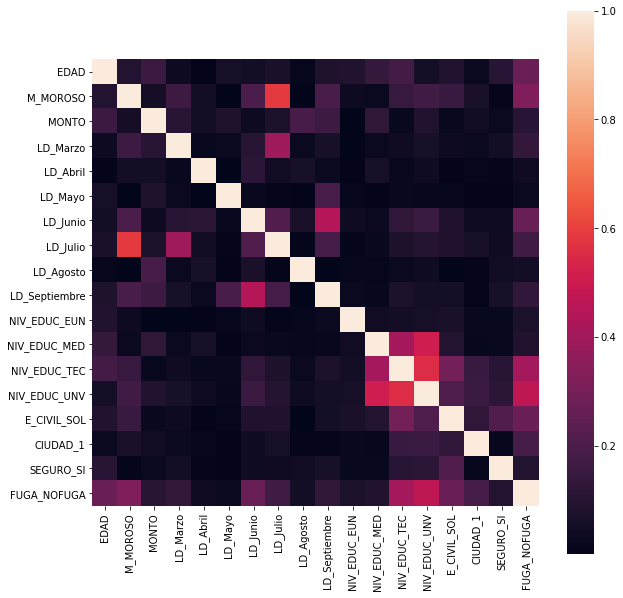

In [100]:
corrmat = data_set.corr().abs()
f, ax = plt.subplots(figsize=(10, 10))
sn.heatmap(corrmat, square=True);

**Selection of most relevant variables with chi square test**

We select the 5 variables that have the largest chi square statistic, as shown below:

First we define as X the independent variables and as Y the dependent variable:

In [96]:
X = data_set.loc[:, data_set.columns != 'FUGA_NOFUGA'] 
y = data_set.loc[:, data_set.columns == 'FUGA_NOFUGA']
X.shape

(2239, 17)

Now we apply the SelectKBest function with the chi squared test to determine the most relevant variables:

In [102]:
X_new = SelectKBest(chi2, k=5).fit(X, y)
#para que devuleva una matriz con lo valores de las variables mas relevantes (numpy array) 
#no se si es necesario poner esto
x_final = X_new.fit_transform(X,y) 
x_final.shape
print(x_final)

[[2.00000000e+06 0.00000000e+00 1.29816244e+01 0.00000000e+00
  0.00000000e+00]
 [7.50000000e+06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [8.00000000e+06 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00]
 ...
 [4.20000000e+06 1.34997815e+01 0.00000000e+00 0.00000000e+00
  1.00000000e+00]
 [4.60000000e+06 0.00000000e+00 1.24578114e+01 0.00000000e+00
  1.00000000e+00]
 [2.10000000e+06 1.01953359e+01 1.24522411e+01 0.00000000e+00
  1.00000000e+00]]


Finally, we can get the names of the selected columns:

In [103]:
kbest = np.asarray(X.columns)[X_new.get_support()]
print(kbest)

['MONTO' 'LD_Marzo' 'LD_Junio' 'NIV_EDUC_TEC' 'NIV_EDUC_UNV']


**Standardization**

In [104]:
Default = data_set['FUGA_NOFUGA']
scaler = MinMaxScaler()
scaler_data = scaler.fit(data_set)
data_set_scaled = pd.DataFrame(scaler_data.transform(data_set), index=data_set.index, columns=data_set.columns)
data_set_scaled['FUGA_NOFUGA'] = Default
print(data_set_scaled)

          EDAD  M_MOROSO     MONTO  ...  CIUDAD_1  SEGURO_SI  FUGA_NOFUGA
0     0.390244  0.666667  0.200000  ...       0.0        0.0            1
1     0.634146  0.333333  0.933333  ...       1.0        1.0            1
2     0.390244  0.333333  1.000000  ...       0.0        0.0            1
3     0.317073  0.333333  0.280000  ...       1.0        0.0            1
4     0.512195  0.333333  0.786667  ...       1.0        0.0            1
...        ...       ...       ...  ...       ...        ...          ...
2289  0.487805  1.000000  0.080000  ...       1.0        1.0            1
2290  0.756098  0.333333  0.173333  ...       0.0        0.0            0
2291  0.682927  0.333333  0.493333  ...       0.0        0.0            0
2292  0.463415  0.666667  0.546667  ...       1.0        0.0            0
2293  0.634146  0.333333  0.213333  ...       1.0        0.0            0

[2239 rows x 18 columns]


In [ ]:
data_set_scaled.head()